<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1** - Kaustubh K Amare
##### **Team Member 2** - Md. Nawab Ali
##### **Team Member 3** - Jahnavi Jaolekar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [157]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
!pip install shap
!pip install scikit-plot
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Load Dataset
crp_df = pd.read_csv('/content/drive/MyDrive/capstone project 3/Copy of data_cardiovascular_risk.csv')

### Dataset First View

In [64]:
# Dataset First Look
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [65]:
# Dataset Rows & Columns count
rows=crp_df.shape[0]
columns=crp_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 3390
Number of columns in dataset are 17


### Dataset Information

In [66]:
# Dataset Info
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [119]:
# Dataset Duplicate Value Count
duplicate=pd.DataFrame[crp_df.duplicated()]
duplicate

0

#### Missing Values/Null Values

In [68]:
# Missing Values/Null Values Count
crp_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

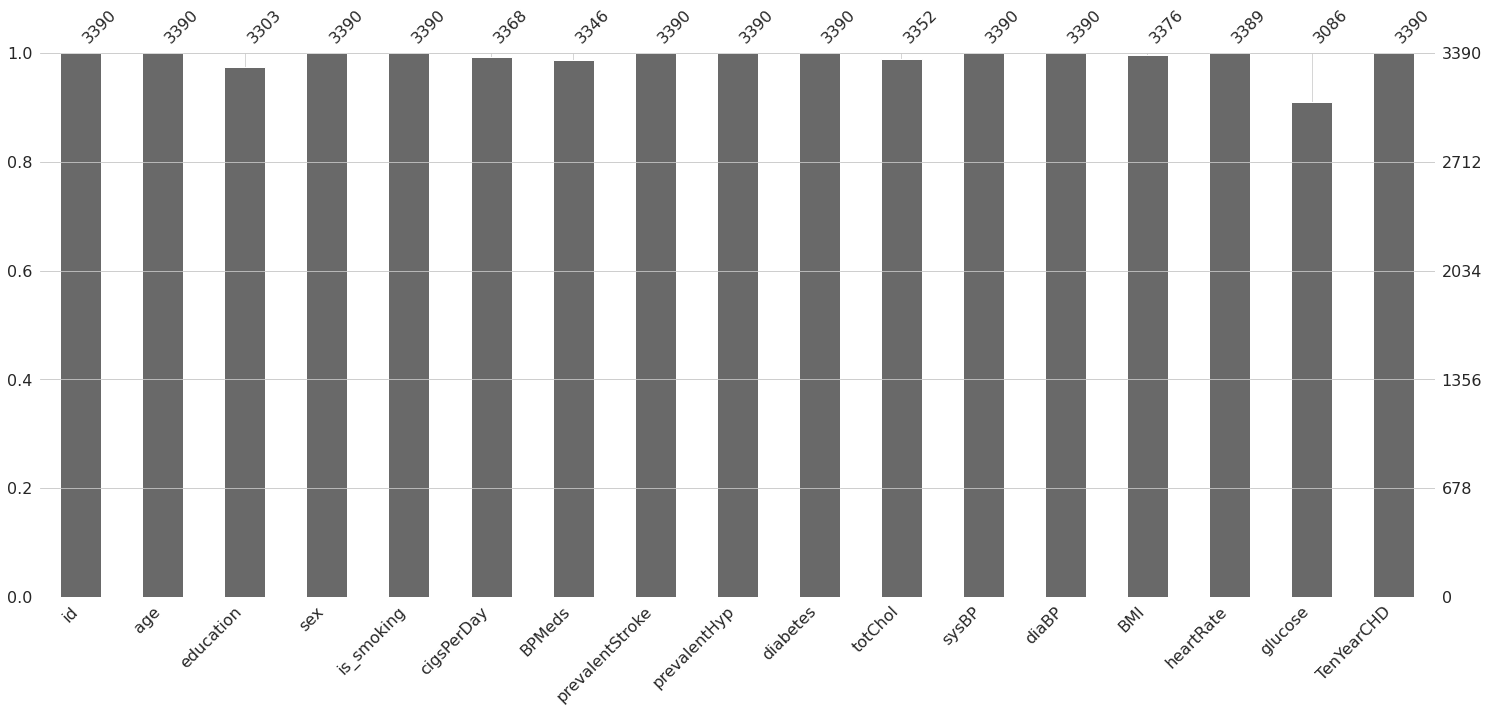

In [69]:
# Visualizing the missing values
msno.bar(crp_df)

### What did you know about your dataset?

Data set is in csv format, it has 3390 rows and 17 columns.

7 columns have null values namely:

education column has 87 null values, cigs_per_day has 22, BP_Meds has 44, totchol has 38, BMI has 14, and glucose ha 304.
since our data set is very small we cannnot remove or drop null values, we can only replace them.

Dataset does not have any duplicate values as well.



## ***2. Understanding Your Variables***

In [70]:
# Dataset Columns
crp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [71]:
# Dataset Describe
crp_df.describe().round(2).style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.000000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.540000,1.970000,9.070000,0.030000,0.010000,0.320000,0.030000,237.070000,132.600000,82.880000,25.790000,75.980000,82.090000,0.150000
std,978.750000,8.590000,1.020000,11.880000,0.170000,0.080000,0.460000,0.160000,45.250000,22.290000,12.020000,4.120000,11.970000,24.240000,0.360000
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Age|Age of the patient||totChol|Cholestrol measure|
|Education|||sysBP|systolic blood pressure|
|Sex|male or female("M" or "F")||diaBP|diastolic blood pressure|
|is_Smoking|Whether smoking currently or not||BMI|Body Mass Index|
|cigsPerDay|Cigarettes smoked per day||heartRate|Heart Rate Measure|
|BPMeds|whether or not the patient was on blood pressure medication||glucose|Level of glucose in th body|
|prevalentStroke|whether or not the patient had previously had a stroke||prevalentHyp| whether or not the patient was hypertensive |
|diabetes|Patient has Diabetes or not||TenYearCHD|10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”|

### Check Unique Values for each variable.

In [72]:
# Check Unique Values for each variable.
for col in crp_df.columns:
  uniques=crp_df[col].unique()
  print(uniques)

[   0    1    2 ... 3387 3388 3389]
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
[ 2.  4.  1.  3. nan]
['F' 'M']
['YES' 'NO']
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
[ 0. nan  1.]
[0 1]
[0 1]
[0 1]
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 313. 305. 285. 169. 224. 201. 185. 307. 179. 280. 219. 391. 300.
 253. 345. 278. 282. 255. 191. 439. 327. 287. 236. 332. 207. 230

## 3. ***Data Preprocessing***

### 1. Handling Missing Values

In [73]:
# Handling Missing Values & Missing Value Imputation
# Replacing null values with median continuos data type 
crp_df['cigsPerDay'] = crp_df['cigsPerDay'].fillna(crp_df['cigsPerDay'].median())
crp_df['totChol'] = crp_df['totChol'].fillna(crp_df['totChol'].median())
crp_df['BMI'] = crp_df['BMI'].fillna(crp_df['BMI'].median())
crp_df['heartRate'] = crp_df['heartRate'].fillna(crp_df['heartRate'].median())
crp_df['glucose'] = crp_df['glucose'].fillna(crp_df['glucose'].median())
# Replacing null values with mode for 
crp_df['education'] = crp_df['education'].fillna(crp_df['education'].mode()[0])
crp_df['BPMeds'] = crp_df['BPMeds'].fillna(crp_df['BPMeds'].mode()[0])

#### What all missing value imputation techniques have you used and why did you use those techniques?

As for the numerical columns we used median to replace null values present we could have used mean value but as we know that mean is affected by outliers whereas median is not affected by outliers. For the categorical data we used mode(returns a repeated value which has been repeated highest) to replace null values 

### 2. Handling Outliers

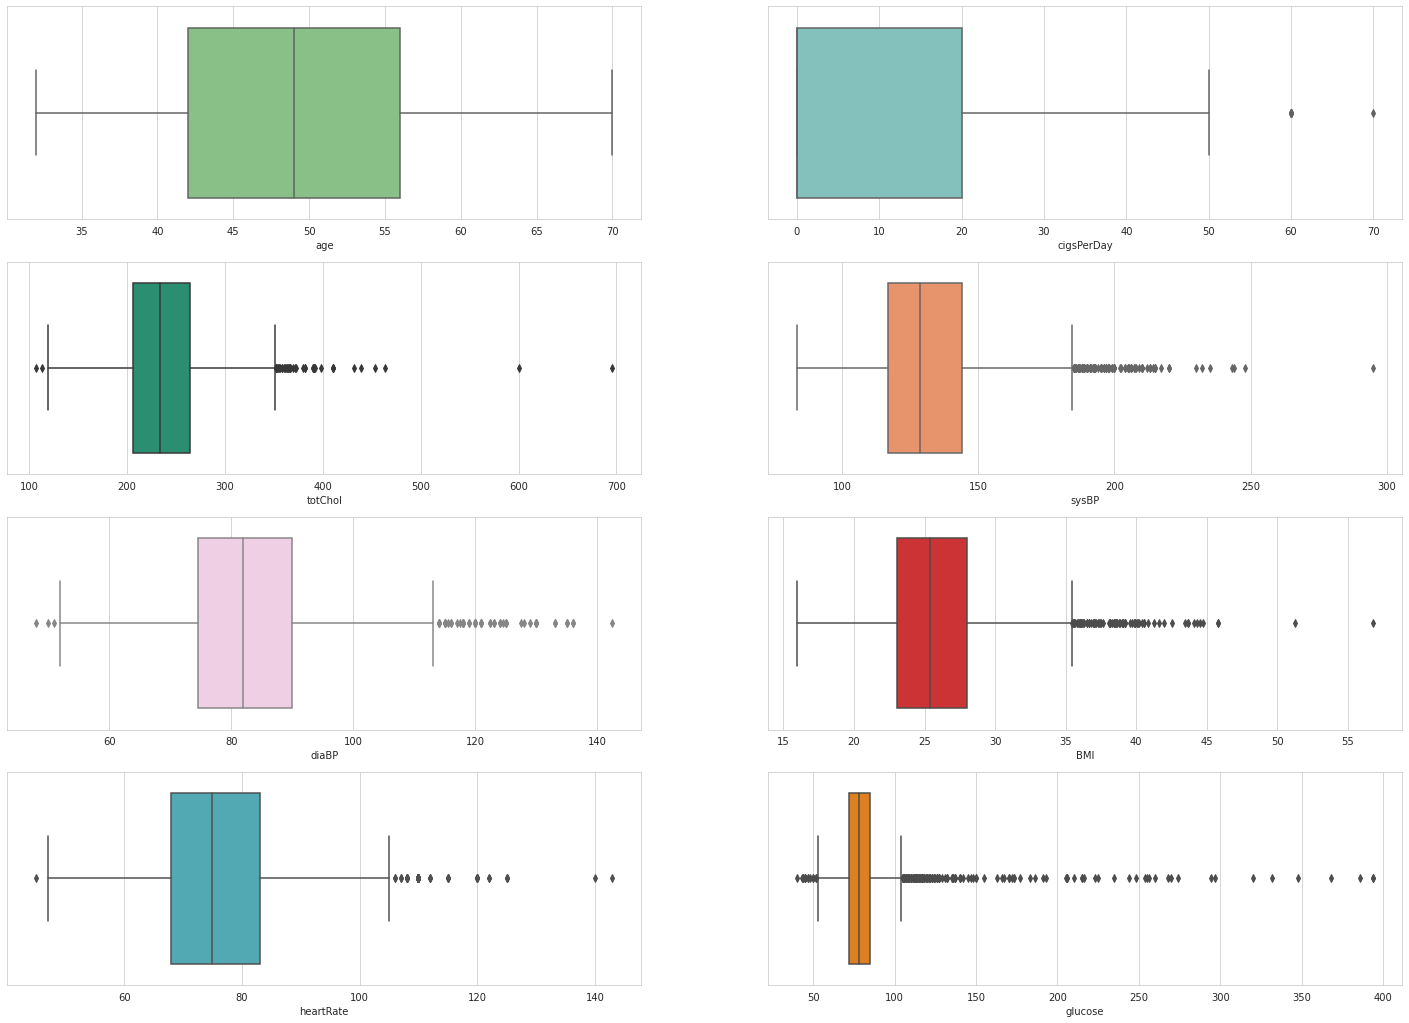

In [74]:
# Handling Outliers & Outlier treatments
# Box plot for visualizing outliers
figure, ax = plt.subplots(nrows=4, ncols=2, figsize=(25,18))
sns.boxplot(crp_df['age'], palette='Accent', ax=ax[0,0])
sns.boxplot(crp_df['cigsPerDay'],palette='GnBu', ax=ax[0,1])
sns.boxplot(crp_df['totChol'],palette='Dark2', ax=ax[1,0])
sns.boxplot(crp_df['sysBP'], palette='OrRd',ax=ax[1,1])
sns.boxplot(crp_df['diaBP'], palette='Pastel2_r', ax=ax[2,0])
sns.boxplot(crp_df['BMI'],palette='Set1', ax=ax[2,1])
sns.boxplot(crp_df['heartRate'], palette='YlGnBu_r', ax=ax[3,0])
sns.boxplot(crp_df['glucose'],palette='autumn', ax=ax[3,1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

As we can see frm the above boxplots that we have a lot of outliers in few of the columns but we cannot reove or replace as high values of BMI, BP, etc show that patient has high risk of cardivascular disease, if we remove these values we might get false results during model predictions. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

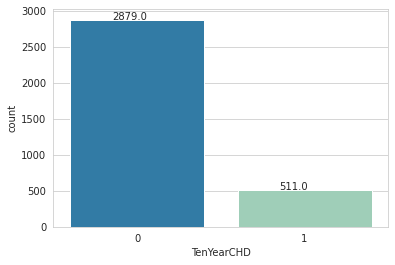

In [75]:
# Chart - 1 visualization code
# target/dependent variable distribution
sns.set_style('whitegrid')
ax=sns.countplot(x='TenYearCHD', data=crp_df, palette='YlGnBu_r')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Distribution of dependent variable shows that very less number of people (511) are prone to cardiovascular risk. Graph clearly shows that 2879 people are out of risk zone.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here - 

#### Chart - 2

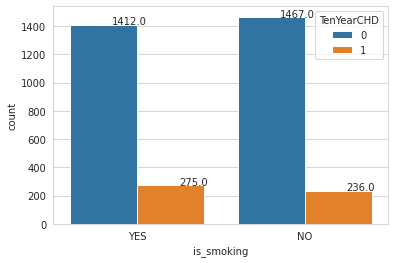

In [76]:
# Chart - 2 visualization code
# CHD among the people who smoke and the ones who don't 
ax=sns.countplot(data=crp_df, x='is_smoking', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above plot shows that even if the person is not smoking he/she is at equal risk of cardiovascular diseases when compared to people who are smoking. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here -  

#### Chart - 3

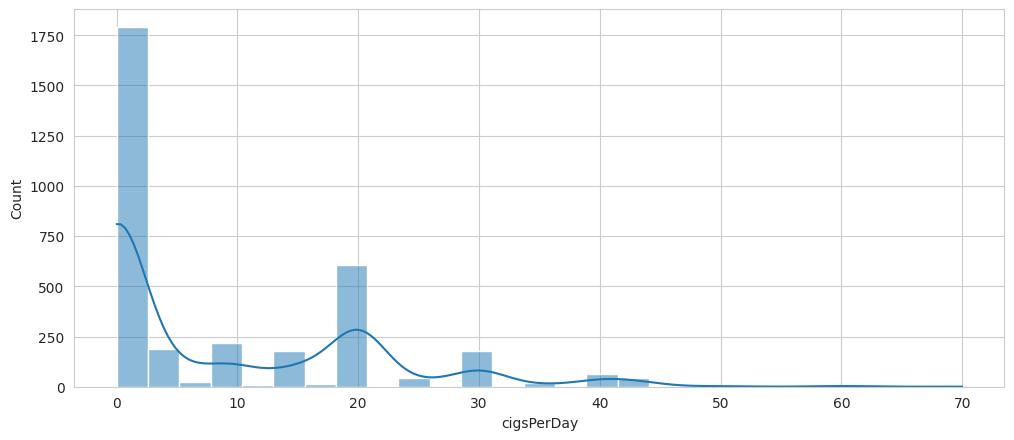

In [123]:
# Chart - 3 visualization code
#cigsPerDay       
plt.figure(figsize=(12,5), dpi=100)
sns.histplot(crp_df['cigsPerDay'], kde=True)

##### 1. Why did you pick the specific chart?

Answer Here - Histogram visualizes quantitative data or numerical data, it illustrates the major features of the distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - As per the data we found that large chunk of population does not consume cigerettes, followed by people consuming 20 cigerettes per day, and people consuming highest number of cigerettes per day (40) were less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

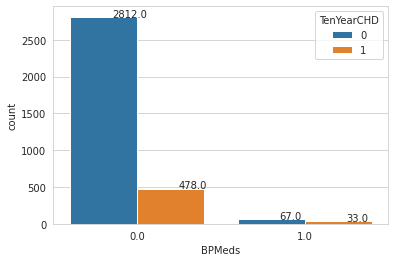

In [78]:
# Chart - 4 visualization code
# tenyearCHD among people who were on BPmeds 
ax=sns.countplot(data=crp_df, x='BPMeds', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Very less number of people were found to be taking BP medicines and 50% of them were at higher risk to cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

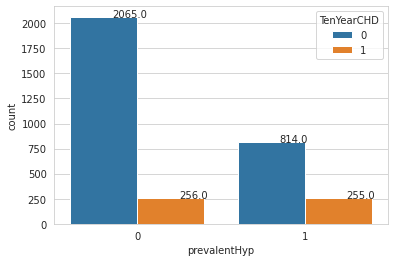

In [79]:
# Chart - 5 visualization code
#PrevelentHype means whether the patient was hypertensive and their chances of happening CHD
ax=sns.countplot(data=crp_df, x='prevalentHyp', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above graph shows that people already having hypertension are more prone to cardiovascular disease(31%) as compared to people not having hypertension(12.4%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

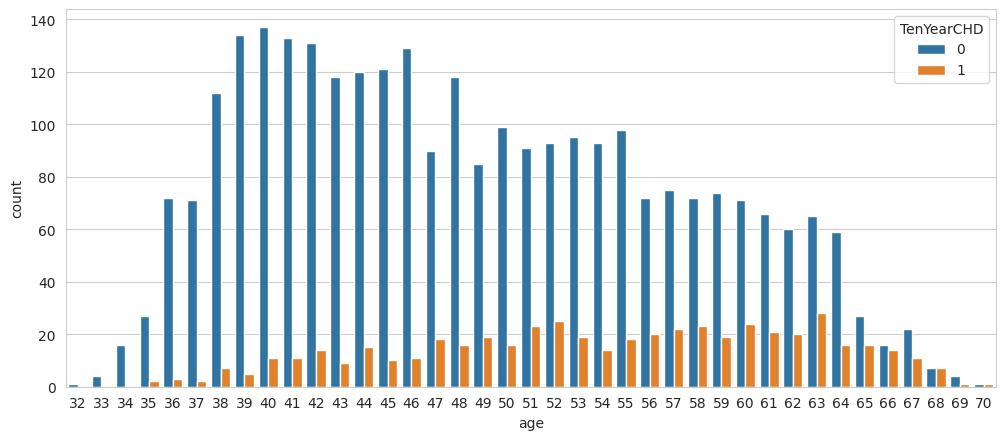

In [80]:
# Chart - 6 visualization code
# Chances of CHD with respect to age 
ax=plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=crp_df, x='age', hue='TenYearCHD')

##### 1. Why did you pick the specific chart?

Answer Here - Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - With increasing age, chances of having cardiovascular disease increases. As the graph shows people from age 50 acquires higher risk of cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

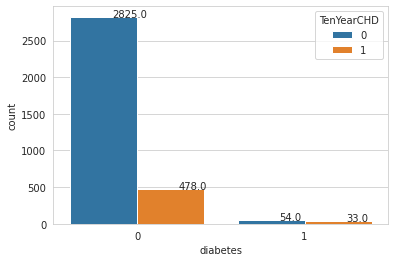

In [81]:
# Chart - 7 visualization code
#Chances of CHD for a diabetic patient 
ax=sns.countplot(data=crp_df, x='diabetes', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


##### 1. Why did you pick the specific chart?

Answer Here  Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Diabetic people are at very high risk of getting cardiovascular disease. As the graph shows  among 87 people 61.1% of population are at higher risk of getting cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

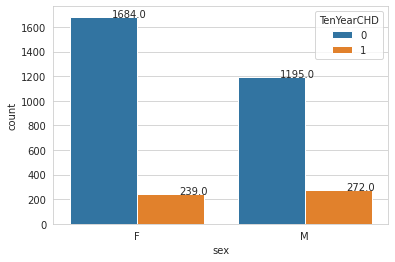

In [82]:
 # Chart - 8 visualization code 
#Cardiovascular Risk Man
ax=sns.countplot(data=crp_df, x='sex', hue='TenYearCHD')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

Answer Here - Bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - As compared to females, males are prone to cardiovascular risks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

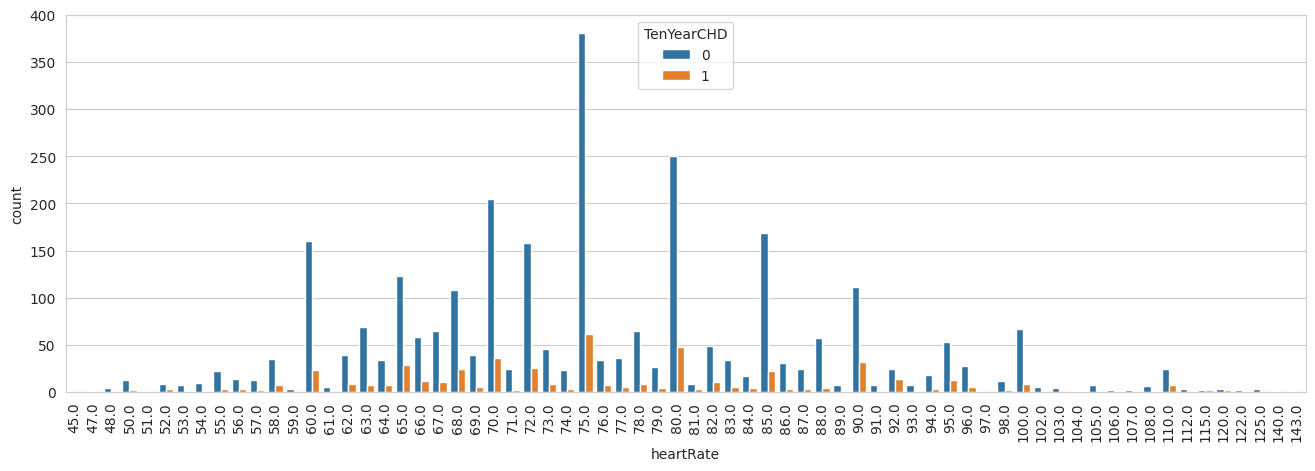

In [126]:
# Chart - 9 visualization code
#CHD chances with respect to heartrate
plt.figure(figsize=(16,5), dpi=100)
sns.countplot(data=crp_df, x='heartRate', hue='TenYearCHD')
plt.xticks(rotation=90);

##### 1. Why did you pick the specific chart?

Answer Here -  Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here -  A large proportion of population was found to have normal heart rate i.e, 75 bpm.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

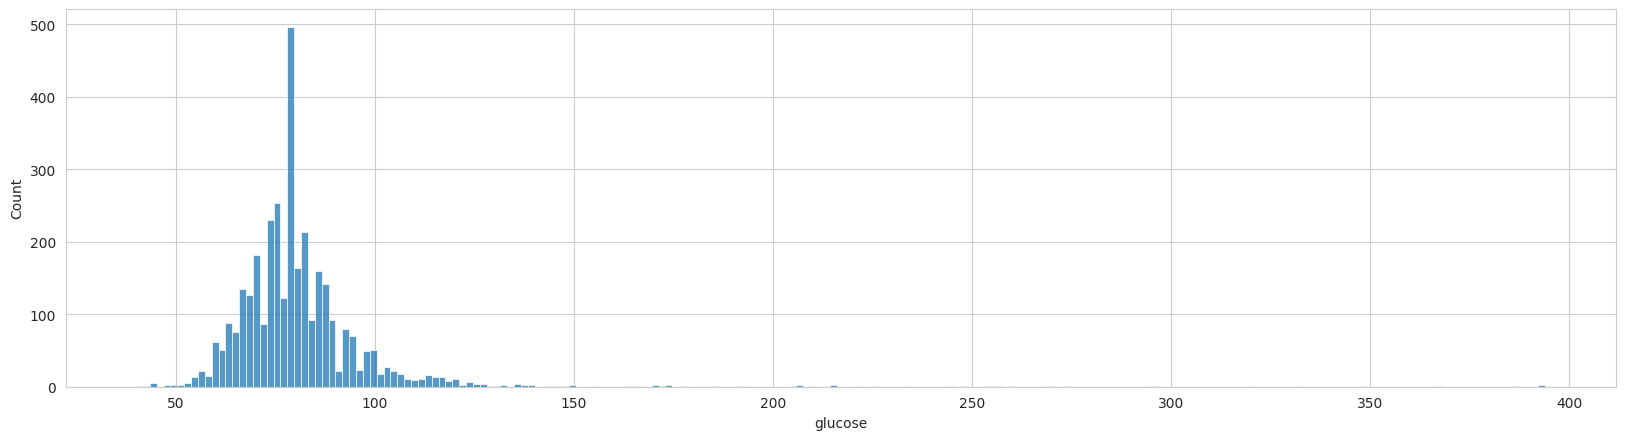

In [127]:
# Chart - 10 visualization code
#CHD chances with the glucose level
plt.figure(figsize=(20,5), dpi=100)
sns.histplot(data=crp_df, x='glucose')

##### 1. Why did you pick the specific chart?

Answer Here -  Histogram visualizes quantitative data or numerical data, it illustrates the major features of the distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Maximum number of people lie in the normal glucose range but there are few exceptions as well who have very high glucose levels (394) in their body.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'BMI vs Age')

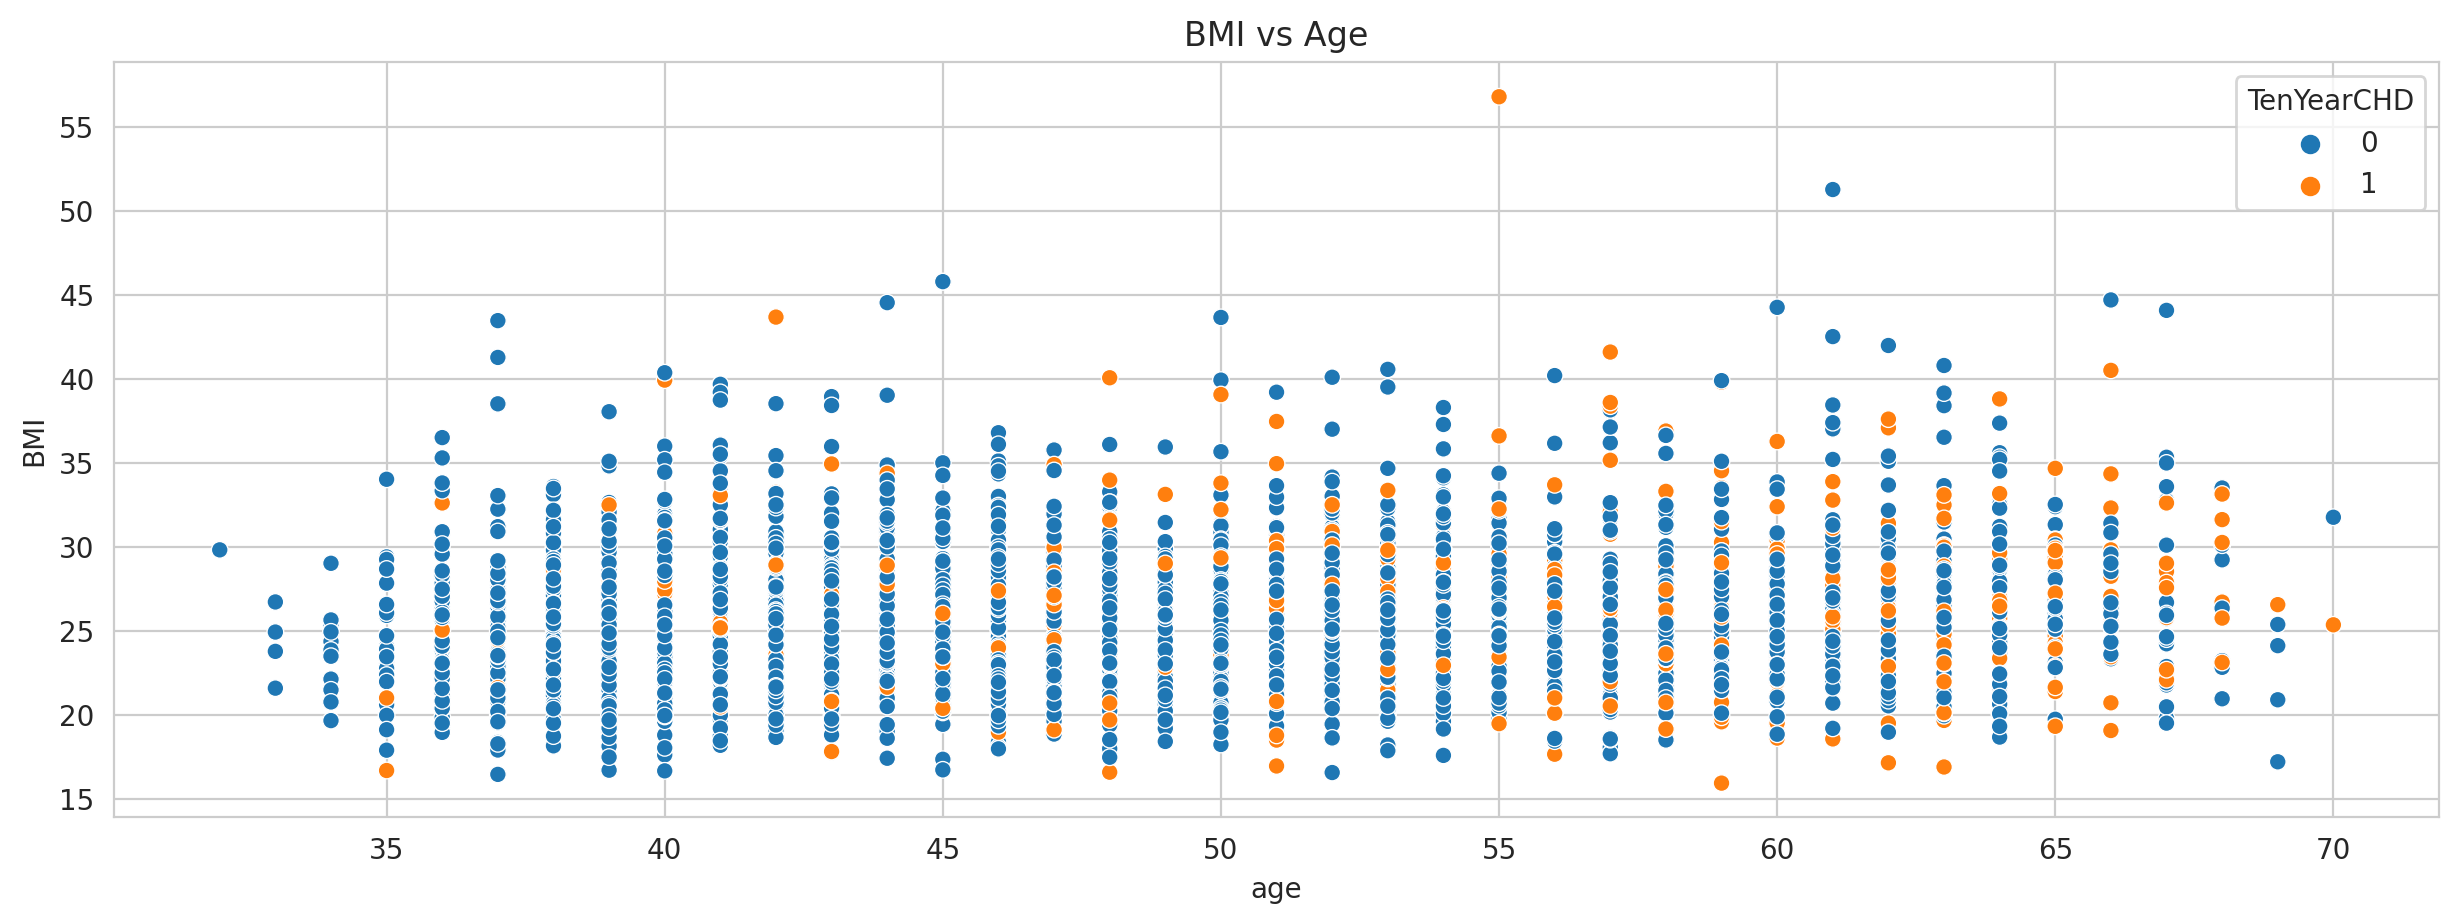

In [85]:
# Chart - 11 visualization code
# BMI vs age and chances of CHD
figure = plt.subplots(figsize=(15,5), dpi=200)
sns.scatterplot(data=crp_df, x='age', y='BMI', hue='TenYearCHD')
plt.title('BMI vs Age')

##### 1. Why did you pick the specific chart?

Answer Here - We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above scatterplot suggests that age has no correlation with BMI. Number of points showing people at risk, increases with increase in age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

Text(0.5, 1.0, 'Systolic BP vs diastolic BP')

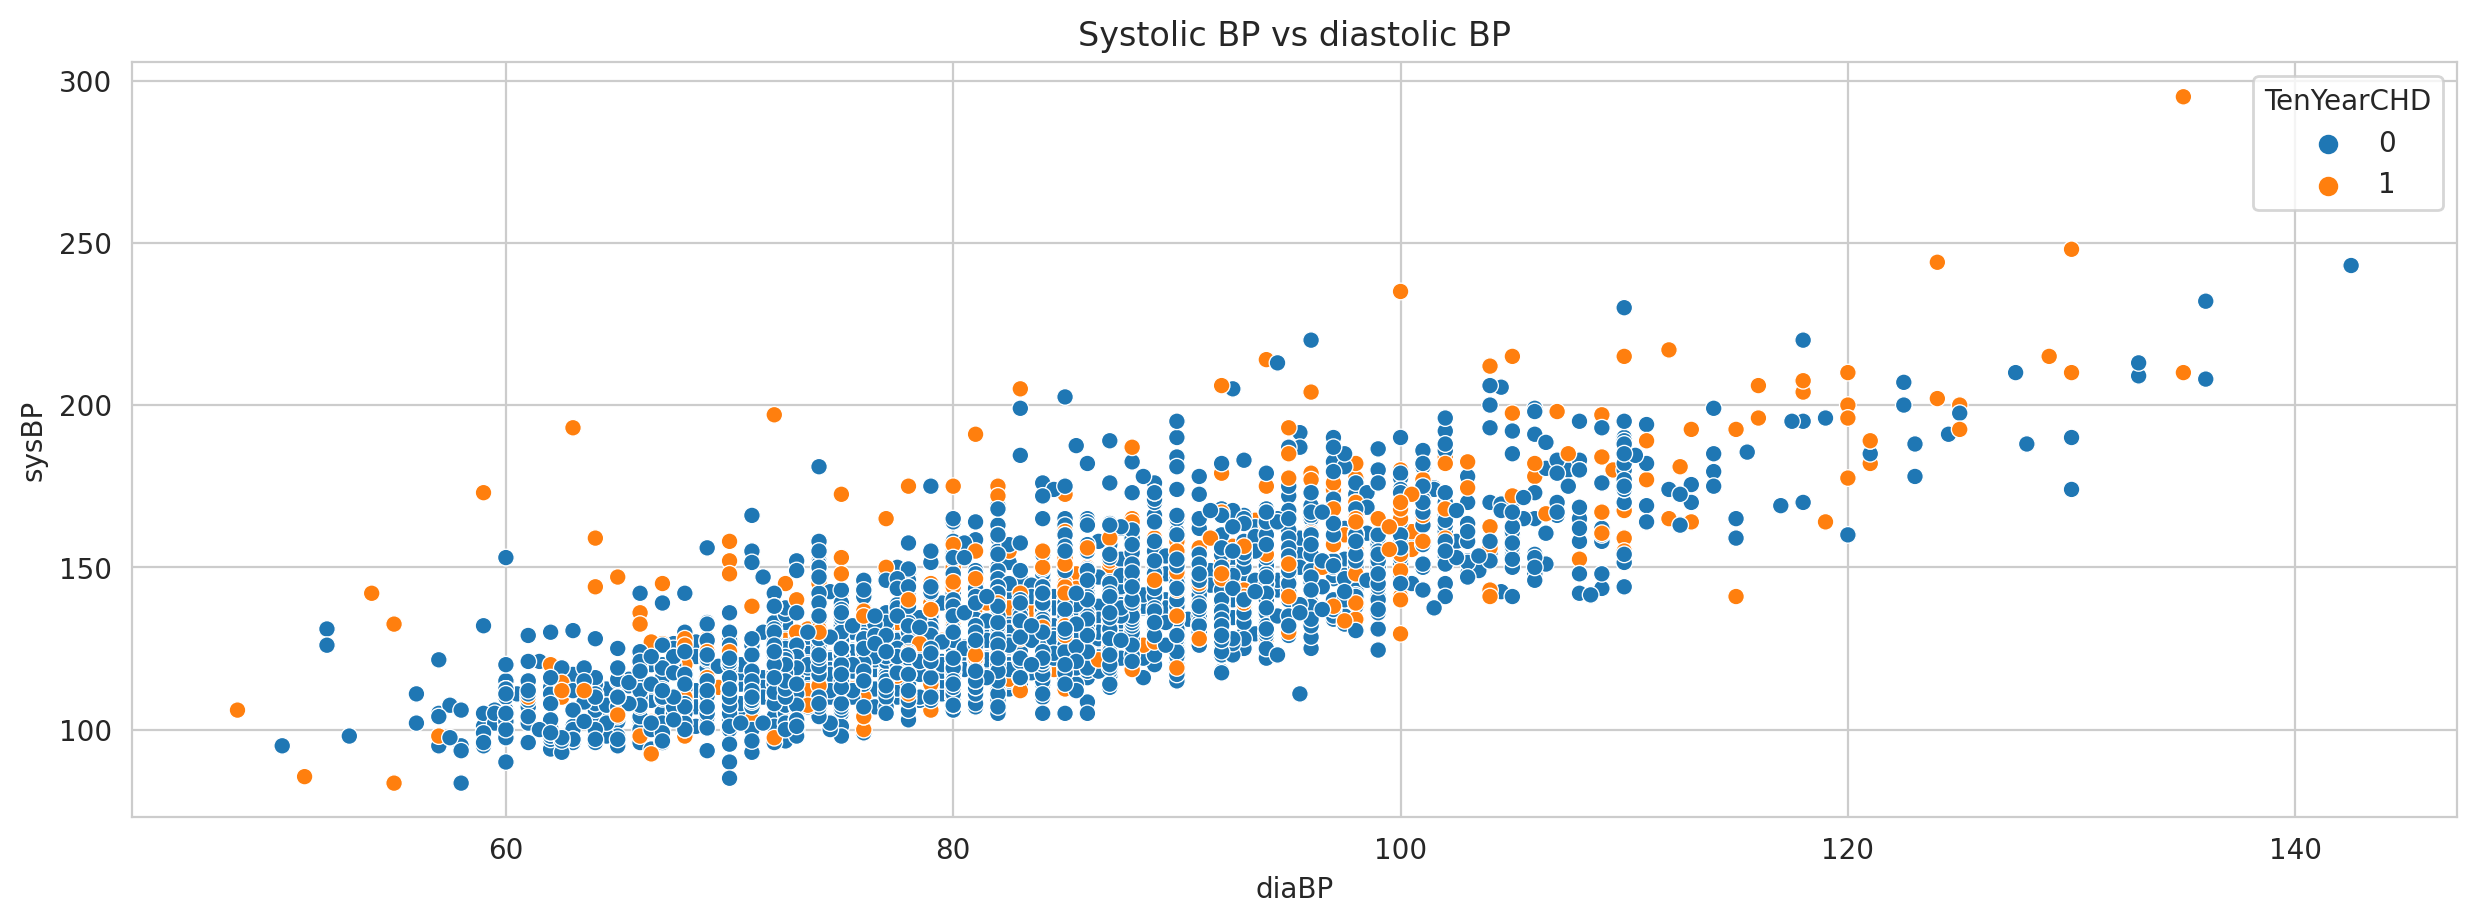

In [86]:
# Chart - 12 visualization code
# Systolic BP and diastolic BP 
figure=plt.subplots(figsize=(15,5), dpi=200)
sns.scatterplot(data=crp_df, y='sysBP', x='diaBP', hue='TenYearCHD')
plt.title('Systolic BP vs diastolic BP')

##### 1. Why did you pick the specific chart?

Answer Here - We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above graph shows that systolic  blood pressure is positively correlated to diastolic blood pressure. As systolic and diatolic pressure increases risk of getting cardiovasclar diseases also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

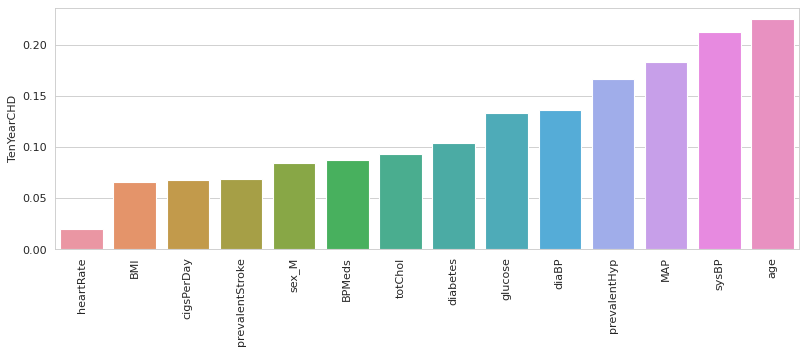

In [130]:
# Chart - 13 visualization code
#order wise corelation wrt TenYearCHD
corr = pd.DataFrame(crp_df.corr()['TenYearCHD'].sort_values()[3:-1])
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(data=corr, x=corr.index, y='TenYearCHD')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here - Bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - The above plot shows correlation of independent variables with dependent variable. we can see that age column is highly correlated to cardiovascular risk, followed by systolic blood pressure, MAP, and prevalent hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

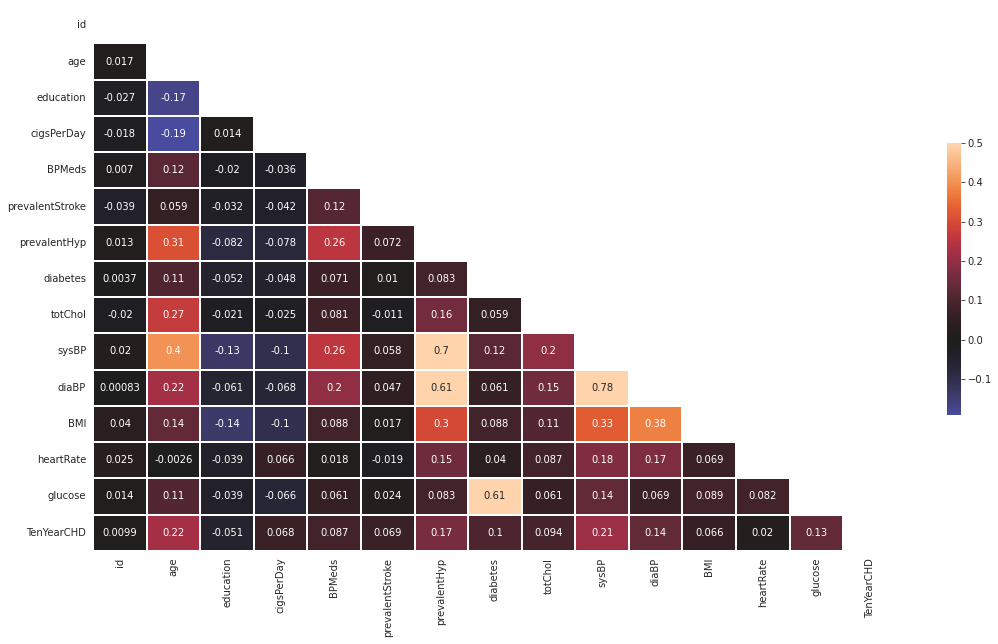

In [88]:
# Correlation Heatmap visualization code 
corr=crp_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, vmax=.5, center=0, annot=True, linewidths=1.0, cbar_kws={"shrink": .5})

##### 1. Why did you pick the specific chart?

Answer Here - Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Heatmap clearly shows that two of the columns namely systolic blood pressure and diastolic blood pressure are highly correlated which migh lead to higher accuracy during model training.

#### Chart - 15 - Pair Plot 

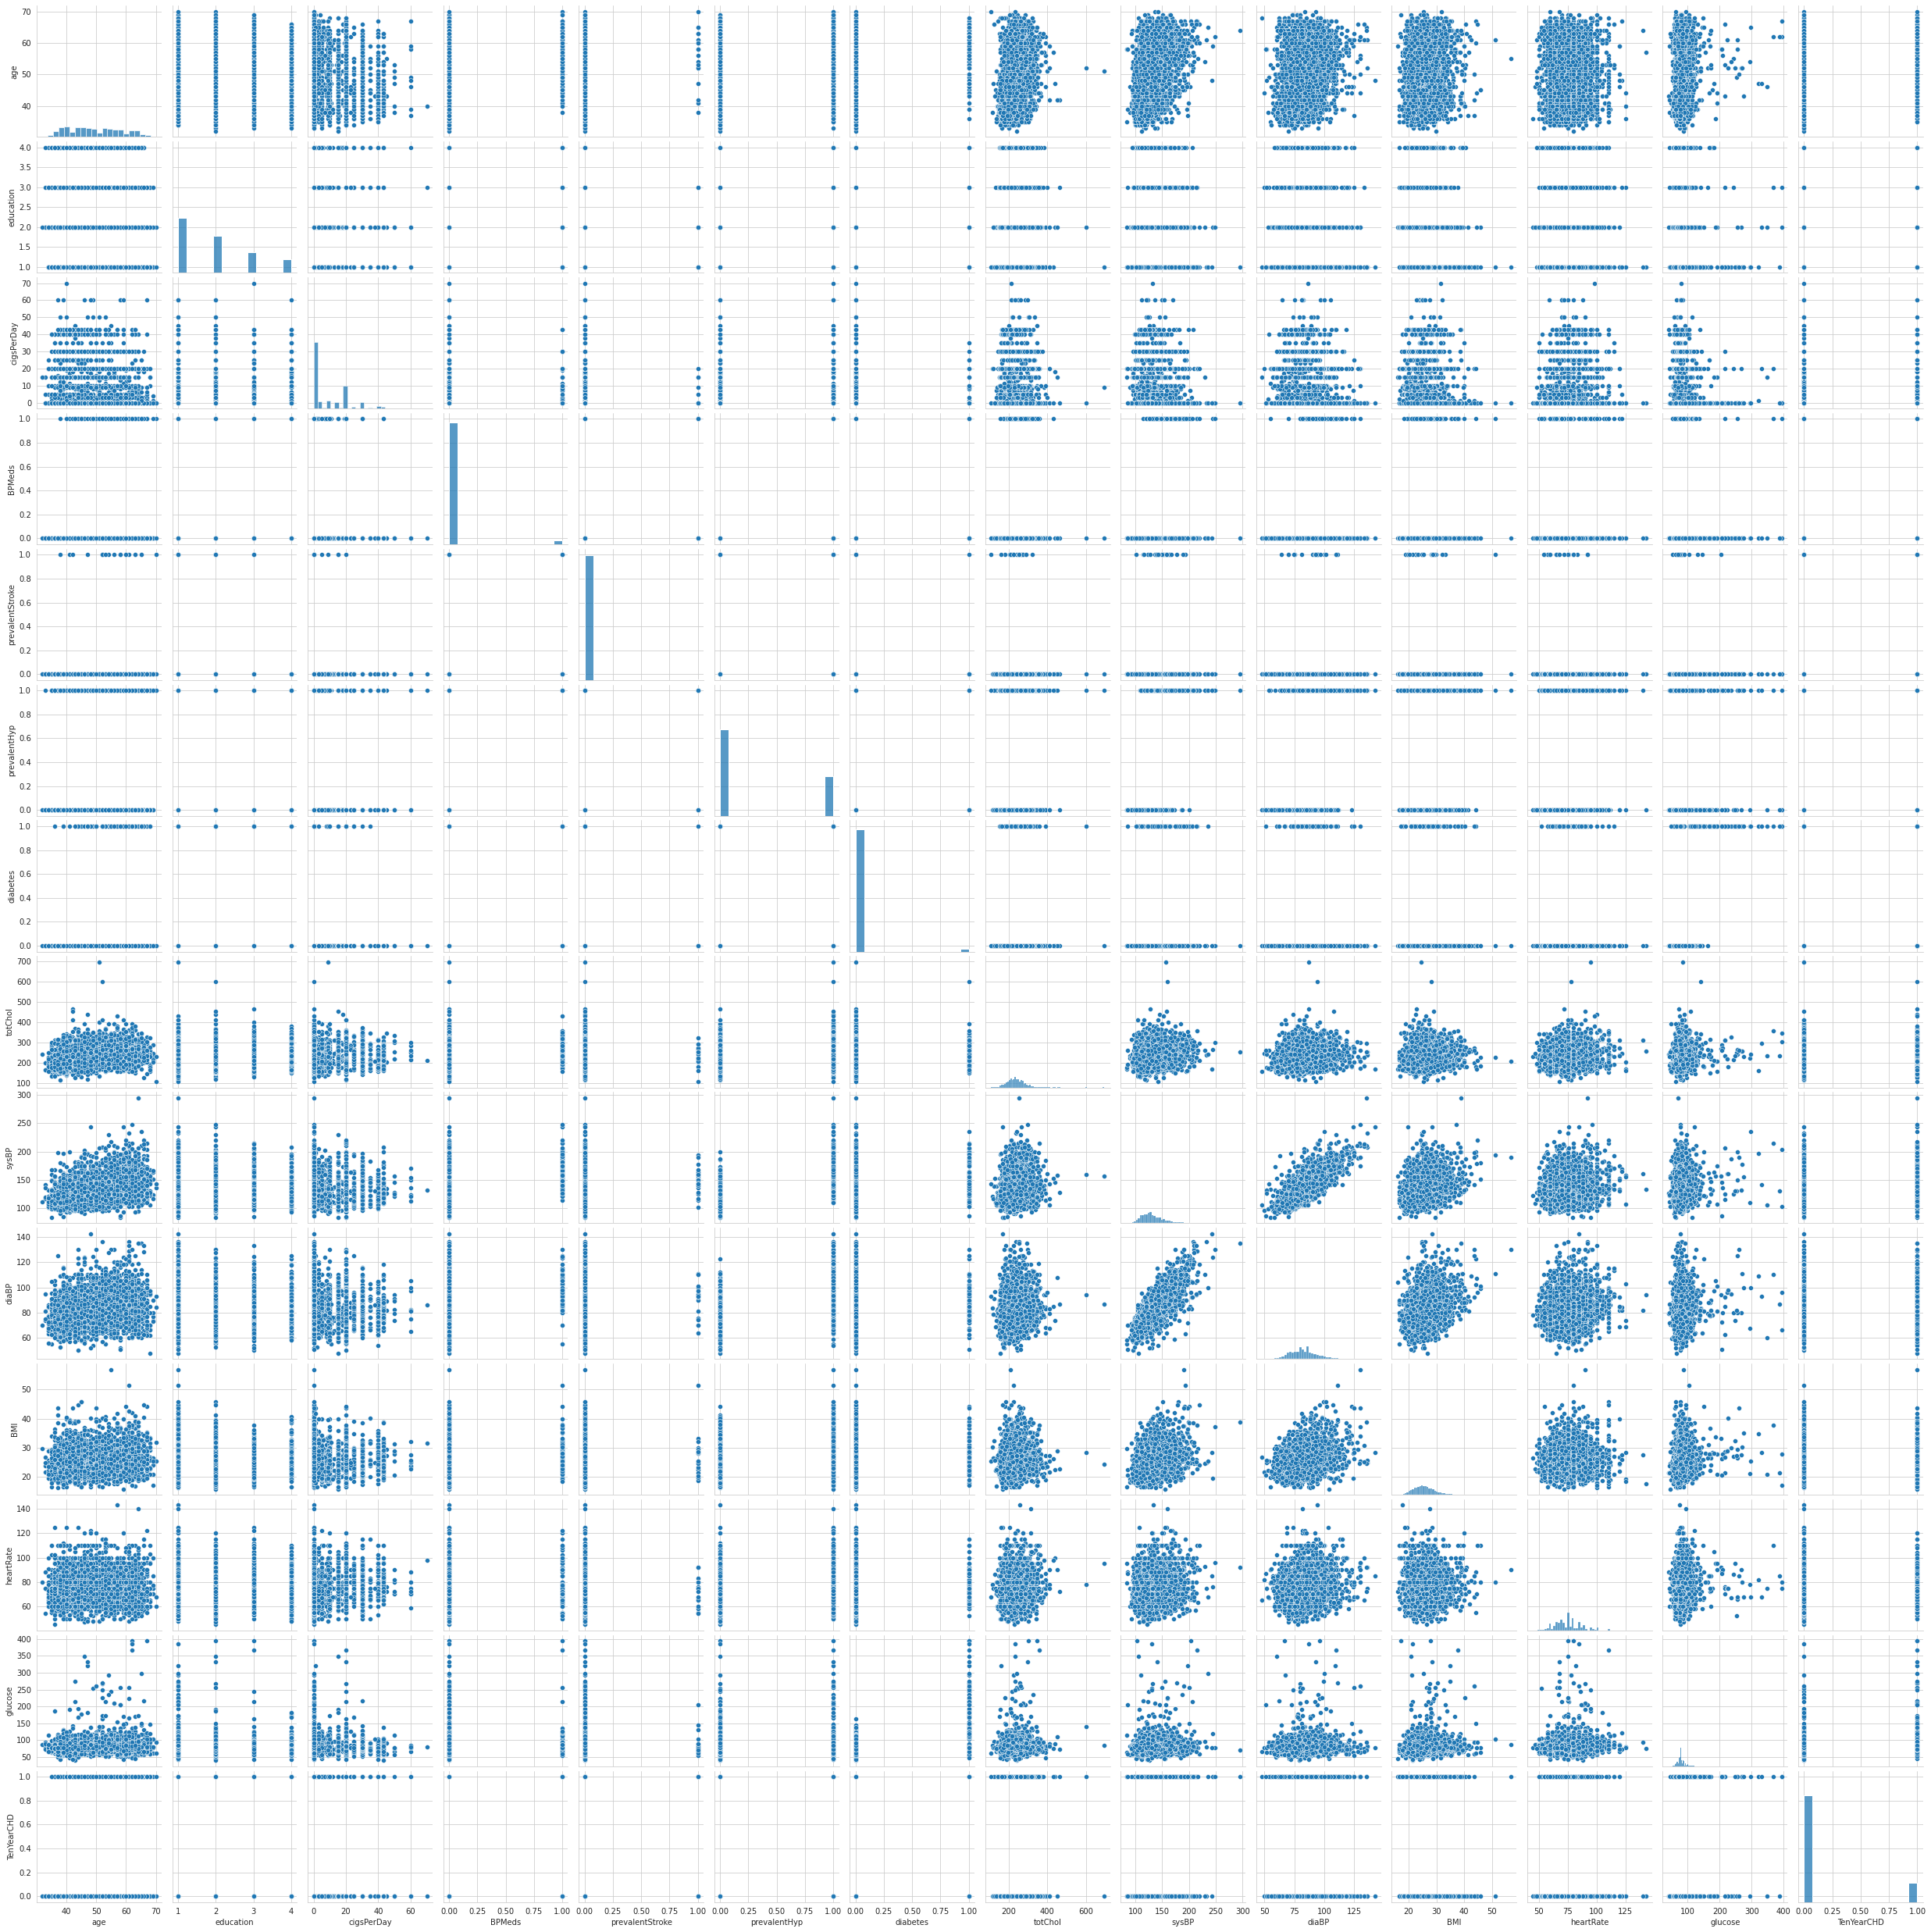

In [89]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=crp_df.drop(('id'), axis=1))

##### 1. Why did you pick the specific chart?

Answer Here - Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.




*   Null Hypothesis(H0) - Data set does not have any outliers.
*   Alternative Hypothesis(H1) - Dataset has outliers.




#### 2. Perform an appropriate statistical test.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

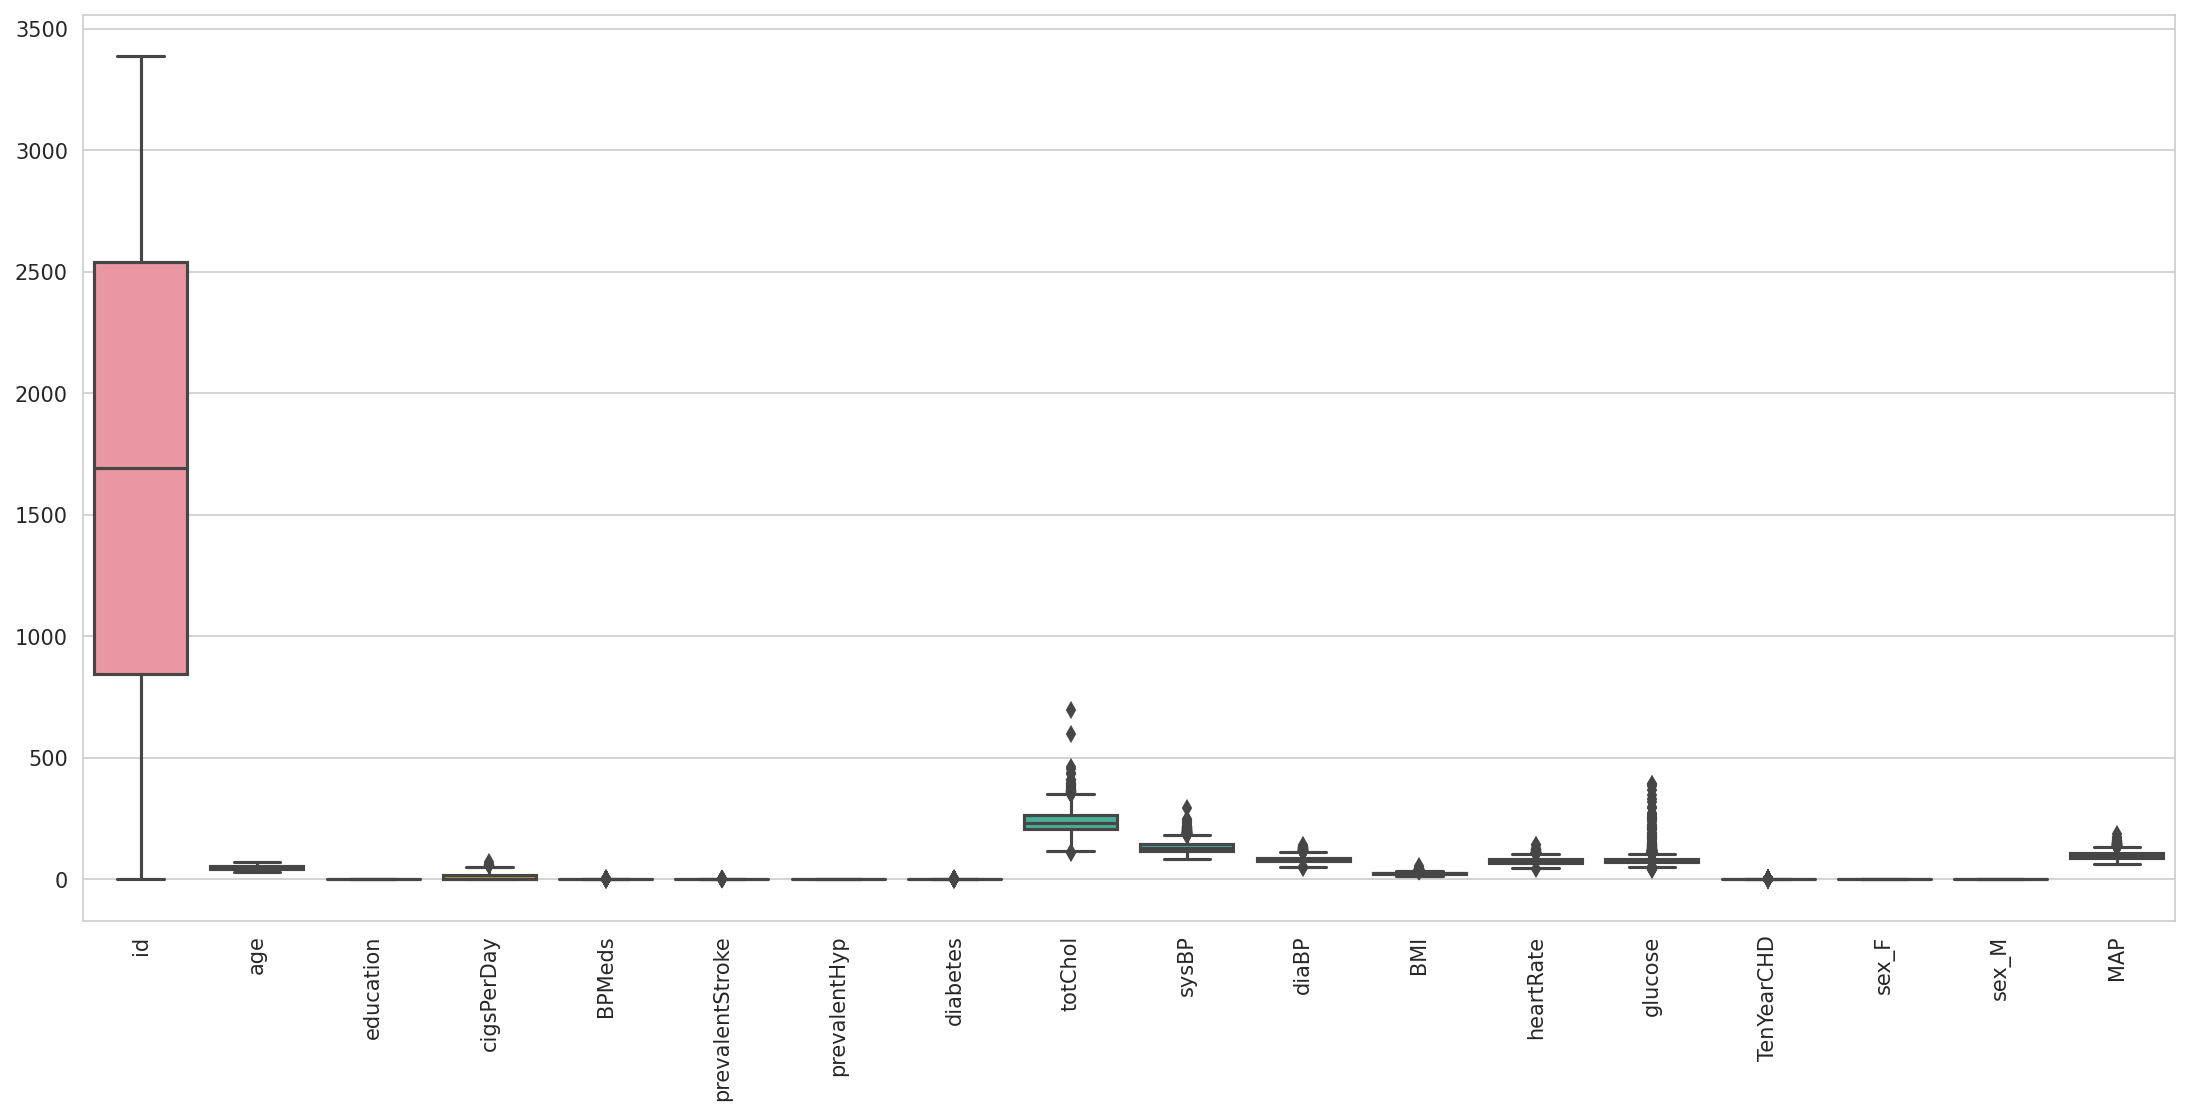

In [187]:
# outliers check
plt.figure(figsize=(18,8),dpi=150)
sns.boxplot(data = crp_df)
plt.xticks(rotation=90)

##### Which statistical test have you done to obtain P-Value?

We have used boxplots for the hypothesis testing, as we are determining the presence of outliers.

##### Why did you choose the specific statistical test?

Boxplots display a 5 number summary of data, this summary is first quartile, mean, third quartile, minimum, maximum, and the values beyond min and max are the outliers. and in the above test we can clearly see that we  have to reject our null hypothesis as our dataset has a lot of outliers.




### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.




*   Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.
*   Alternative Hypothesis(H1) - Age is not related to cardiovascular risks.




#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
  
# defining the table
data = [crp_df['age'], crp_df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

p value is 1.0
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

Chi Square Test

##### Why did you choose the specific statistical test?

We have used chi-square test in order to determine whether there is a significant association between the two variables. In our case 'age' and 'TenyearCHD' are the two variables. test shows that age and risk have a significant impact on each other,therefore we failed to reject null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis(H0) - mean = 237
*   Alternative Hypothesis(H1) - mean != 237




#### 2. Perform an appropriate statistical test.

In [92]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(crp_df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject H0")
else:
    print("failed to reject H0")

0.9589015715213028
failed to reject H0


##### Which statistical test have you done to obtain P-Value?

Z-Test

##### Why did you choose the specific statistical test?

Z-Test is used usually when data points are independent of each other and data is normally distributed.
failed to reject null hypothesis as condition stands true

## ***6. Feature Engineering***

### 1. Categorical Encoding

In [93]:
# Encode your categorical columns
crp_df=pd.get_dummies(crp_df, columns=['sex'])
crp_df.columns

Index(['id', 'age', 'education', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'sex_F', 'sex_M'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [94]:
# Manipulate Features to minimize feature correlation and create new features
# Adding pulse pressure as a column
crp_df['MAP'] =  (crp_df["sysBP"] + 2 * crp_df["diaBP"])/3

#### 2. Feature Selection

In [188]:
# Select your features wisely to avoid overfitting
features=['age', 'education','sex_F', 'sex_M', 'BPMeds', 'cigsPerDay' ,'totChol','heartRate', 'BMI','prevalentStroke','glucose',  'prevalentHyp',  'diabetes', 'MAP']
final_df= crp_df[features]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 3. Data Scaling

In [189]:
# Scaling your data
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
columns = [i for i in crp_df.describe().columns if i not in ['TenYearCHD']]

##### Which method have you used to scale you data and why?

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [190]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 5. Data Splitting

In [191]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=final_df[features]
y=crp_df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 21)

##### What data splitting ratio have you used and why? 

Answer Here.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [192]:
# Handling Imbalanced Dataset (If needed)
x_smote, y_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2304
1     408
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2278
1    2278
Name: TenYearCHD, dtype: int64 



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

 It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.

We need to create a model that can forecast the risk of CHD, which is the rationale behind that. The model need to be able to foretell the risk of heart disease if there is even a remote possibility, given the patient's health statistics.

However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.

A typical technique would have improved our accuracy in this case due to the class imbalance, but in the real world, such a model isn't an acceptable answer because it's predicted that it will frequently fail to determine whether the patient is at risk, defeating the goal of the project.

Therefore, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class..

## ***7. ML Model Implementation***

### ML Model - 1

In [193]:
# ML Model - 1 Implementation
logreg = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
logreg.fit(x_smote,y_smote)
# Predict on the model
train__prob_preds = logreg.predict_proba(x_smote)
test__prob_preds = logreg.predict_proba(x_test)[:,1]
train_preds = logreg.predict(x_smote)
test_preds = logreg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

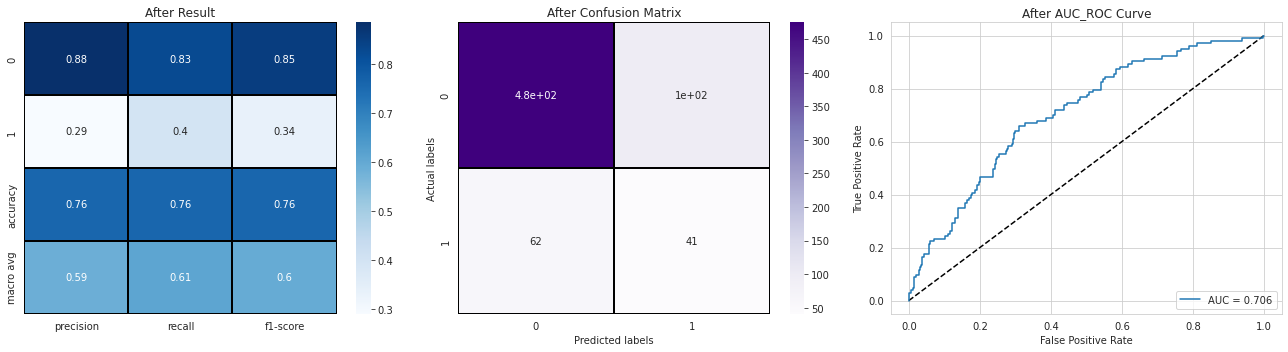

In [194]:
# Visualizing evaluation Metric Score chart
result_1 = pd.DataFrame(classification_report(y_pred=test_preds, y_true=y_test, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_test, test__prob_preds)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_1.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

### ML Model - 2

In [195]:
# ML Model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the Algorithm
knn.fit(x_smote, y_smote)
# Predict on the model
knn_y_pred = knn.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

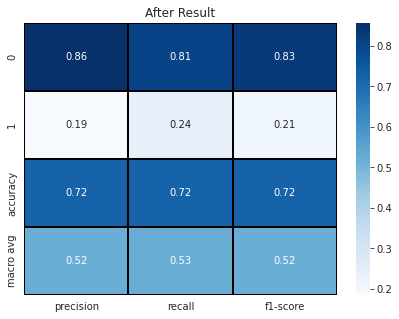

In [196]:
# Visualizing evaluation Metric Score chart
result_2 = pd.DataFrame(classification_report(y_pred=knn_y_pred, y_true=y_test, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_2.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [197]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn = KNeighborsClassifier() 

# GridSearch to find the best parameters
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn, param_grid, cv=5)
# Fit the Algorithm
knn_cv.fit(x_smote, y_smote)
# Predict on the model
knn_cv_y_pred = knn_cv.predict(x_test)
knn_y_pred_proba = knn_cv.predict_proba(x_test)[:,1]

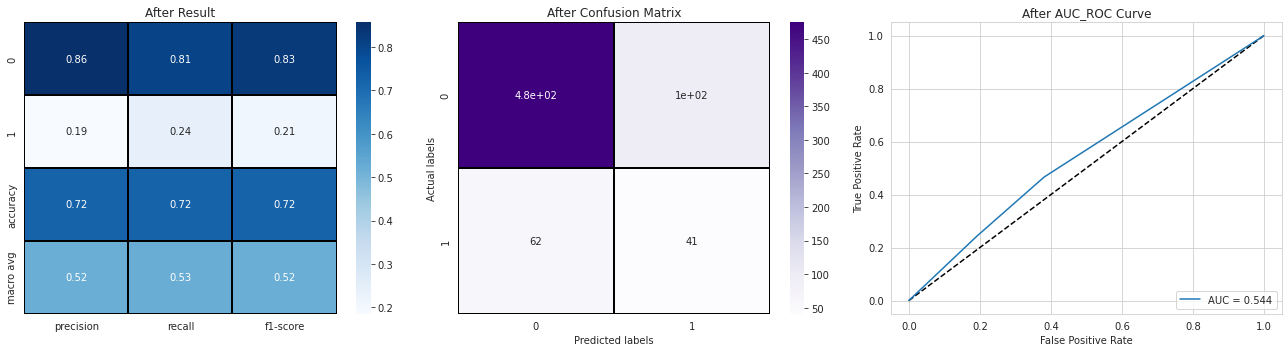

In [198]:
# Visualizing evaluation Metric Score chart
result_3 = pd.DataFrame(classification_report(y_pred=knn_cv_y_pred, y_true=y_test, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_3.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [199]:
# ML Model - 3 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_smote, y_smote)
# Predict on the model
nb_y_pred = nb.predict(x_test)
nb_y_train_pred = nb.predict(x_smote)
nb_y_pred_proba = nb.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

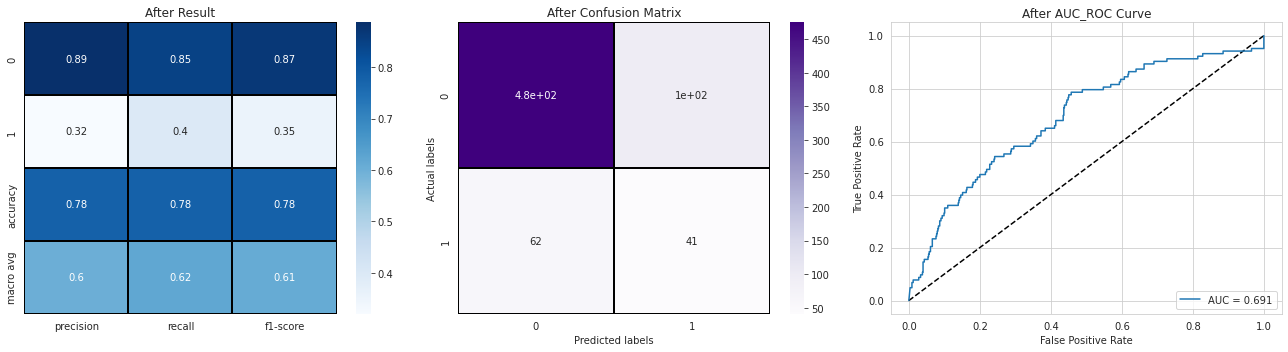

In [200]:
# Visualizing evaluation Metric Score chart
result_4= pd.DataFrame(classification_report(y_pred=nb_y_pred, y_true=y_test, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_test, nb_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_4.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

### ML Model - 4

In [201]:
# ML Model - 1 Implementation
xgb = XGBRFClassifier()
# Fit the Algorithm
xgb.fit(x_smote, y_smote)
# Predict on the model
xgb_y_pred = xgb.predict(x_test)
xgb_y_pred_proba = xgb.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

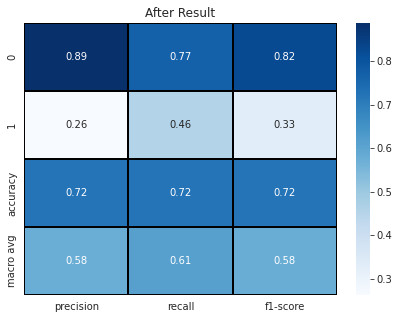

In [202]:
# Visualizing evaluation Metric Score chart
result_5 = pd.DataFrame(classification_report(y_pred=xgb_y_pred, y_true=y_test, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_5.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [203]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb = XGBRFClassifier()

# GridSearch to find the best parameters
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}
xgb_cv= GridSearchCV(xgb, param_grid = grid, scoring = scoring, cv=5)

# Fit the Algorithm
xgb_cv.fit(x_smote, y_smote)
# Predict on the model
xgb_cv_y_pred = xgb_cv.predict(x_test)
xgb_cv_y_pred_proba = xgb_cv.predict_proba(x_test)[:,1]

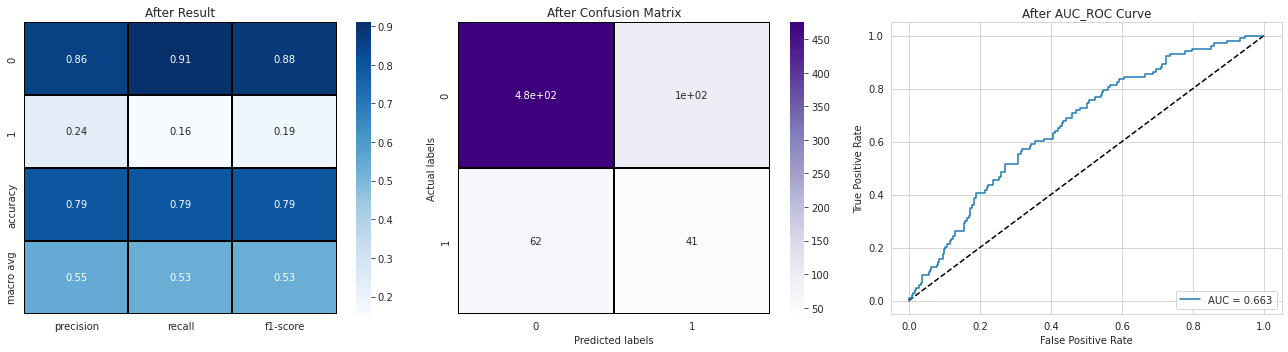

In [204]:
# Visualizing evaluation Metric Score chart
result_6 = pd.DataFrame(classification_report(y_pred=xgb_cv_y_pred, y_true=y_test, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_test, xgb_cv_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_6.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

### ML Model - 5

In [205]:
# ML Model - 1 Implementation
rfc = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rfc.fit(x_smote, y_smote)
# Predict on the model
rfc_y_pred = rfc.predict(x_test)
rfc_y_pred_proba = rfc.predict_proba(x_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'After Result')

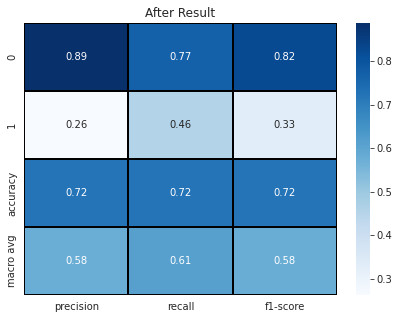

In [206]:
# Visualizing evaluation Metric Score chart
result_7 = pd.DataFrame(classification_report(y_pred=xgb_y_pred, y_true=y_test, output_dict=True))
# Classification report
plt.figure(figsize=(7,5))
sns.heatmap(result_7.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

#### 2. Cross- Validation & Hyperparameter Tuning

In [207]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_cv = RandomForestClassifier(random_state=2)

# GridSearch to find the best parameters
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}
rfc_grid = GridSearchCV(rfc_cv, param_grid = grid, scoring = scoring, cv=5)
# Fit the Algorithm
rfc_grid.fit(x_smote, y_smote)
best_model = rfc_grid.best_estimator_

# Predict on the model
rfc_cv_y_pred = best_model.predict(x_test)
rfc_cv_y_pred_proba = best_model.predict_proba(x_test)[:,1]

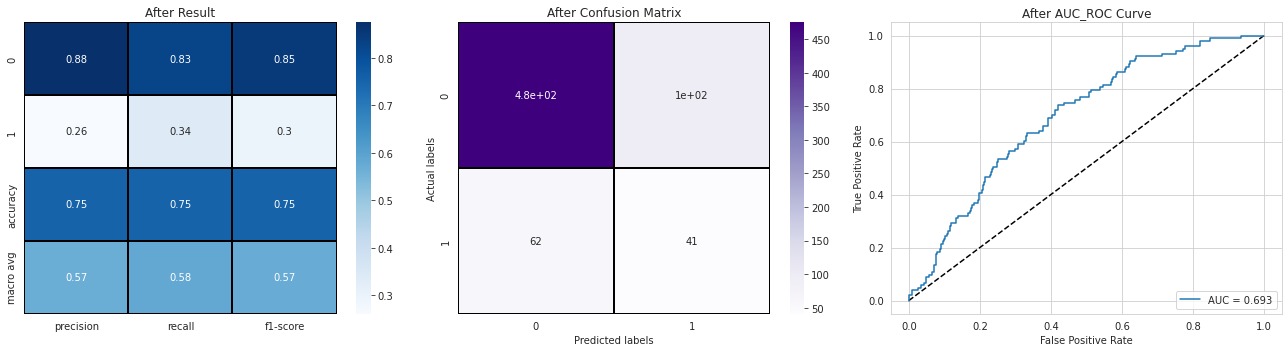

In [208]:
# Visualizing evaluation Metric Score chart
result_8 = pd.DataFrame(classification_report(y_pred=rfc_cv_y_pred, y_true=y_test, output_dict=True))
fpr, tpr, thresholds = roc_curve(y_test, rfc_cv_y_pred_proba)
# Classification report
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.heatmap(result_8.iloc[:-1, :-1].T, annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Result')

# Confusion Matrix
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_preds), annot=True, cmap='Purples', linecolor='Black', linewidths=1.0)
plt.title(f'{label} Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
    
# AUC_ROC Curve
plt.subplot(1,3,3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
plt.legend(loc=4)
plt.title(f'{label} AUC_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [211]:
# # Importing SHAP
# import shap
# # Creating instances of shap
# explainer = shap.TreeExplainer(best_model)
# shap_values = explainer.shap_values(x_test)
# # As X_test is an array without column names we will build a dataframe
# shap_df = pd.DataFrame(x_test, columns = ['age', 'education','sex_F', 'sex_M', 'BPMeds', 'cigsPerDay' ,'BMI'
#                                           'totChol','heartRate' ,'prevalentStroke','glucose',  'prevalentHyp',  'diabetes', 'MAP'])
# # SHAP Summary Plot
# shap.summary_plot(shap_values, shap_df, plot_type = 'bar')  


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***